In [1]:
using Random
using Plots
using LinearAlgebra
using Distributions
using CSV
using DataFrames

### Functions

In [2]:
struct Perceptron
    weights::Vector{Real}
    cost::Real
end
    
function signum(z)
    
    if z >= 0
        return 1
    end
    
    return -1
end

function predict(weights, x)
    return signum(dot(x, weights[2:end]) + weights[1])
end

function predict(predictor::Perceptron, x)
    return signum(dot(x, predictor.weights[2:end]) + predictor.weights[1])
end

function misclassification_rate(y_true, y_pred)
    misclassifications = []
    for i=1:length(y_true)
        if y_true[i] == y_pred[i]
            push!(misclassifications, 0)
        else
            push!(misclassifications, 1)
        end
    end
    return sum(misclassifications)/length(y_true)
end

function perceptron_learning_rule(X, y, epochs=10, learning_rate=0.01)
    
    n, p = size(X)
    d = Uniform(-1,1)
    weight_vec = rand(d, p+1)               # Initialize the weights using random values
    perceptron_updates = Perceptron[]
    cost = 10000
    push!(perceptron_updates, Perceptron(weight_vec, cost))
    best_model = perceptron_updates[end]
    t = 0
    
    while cost > 0 && t < epochs
        
        running_cost = 0
        
        for i=1:n
        
            # calculate the predictions using the model parameters
            weight_vec_prev = weight_vec
            y_hat = predict(weight_vec, X[i,:])
            
            # update the parameters using the data
            weight_vec[1] = weight_vec_prev[1] + learning_rate * (y[i] - y_hat)
            for j = 1:p
                weight_vec[j+1] = weight_vec_prev[j+1] + learning_rate * (y[i] - y_hat) * X[i,j]
            end
            
            running_cost = running_cost + abs(y[i] - y_hat)
        end
        
        cost = running_cost
        println("Cost = $cost")
        push!(perceptron_updates, Perceptron(weight_vec, cost))
        
        if best_model.cost > cost
            best_model = perceptron_updates[end]
        end
        
        t = t + 1
    end
    
    return best_model
end


function dec_boundary(arguments)
    #### You need to implement an algorithm to find the decision boundary
    return nothing
end

function sensitivity_analysis(arguments)
    #### You need to implement an algorithm that can generate decision boundaries for several training replications of the perceptron model
    return nothing
end

sensitivity_analysis (generic function with 1 method)

# Instructions

You need to implement two functions:
 - dec_boundary: this function finds the decision boundary of the perceptron based on the weights derived by the model
 - sensitivity_analysis: this function uses the dec_boundary to replicate N trainings. Thus, it shows the AVERAGE MISCLASSIFICATION RATE of all the training replications and the decision boundaries for each training replication. You are left to decide how many replications you are going to perform to determine the model's stability.

## Problem 1

### Importing Dataset

In [3]:
dataset = CSV.read("problem_1.csv", DataFrame)
dataset

Row,X1,X2,Class
,Float64,Float64,Float64
1,9.26771,6.09835,-1.0
2,5.02924,7.37299,1.0
3,5.16104,10.6784,1.0
4,4.02353,10.0947,1.0
5,11.1768,3.83397,-1.0
6,9.78434,5.58006,-1.0
7,4.90465,9.3467,1.0
8,8.98247,6.6066,-1.0
9,4.63957,9.89236,1.0


### Model Training

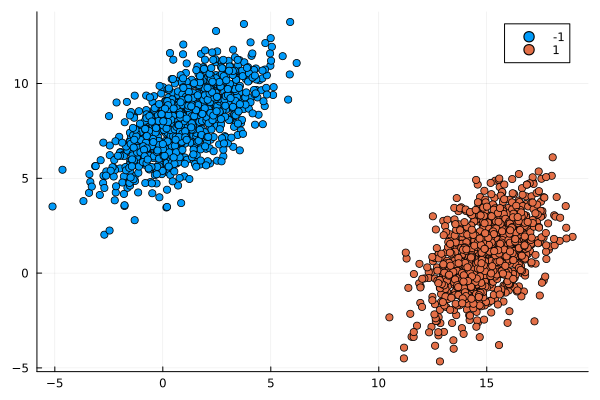

In [48]:
X = dataset[:,1:2]
y = dataset[:,end]
scatter(X[:,1], X[:,2], group=y_preds)

In [45]:
perceptron_model =  perceptron_learning_rule(X, y, 19)

Cost = 4.0
Cost = 0.0


Perceptron(Real[0.8929445253266515, 0.38316938745522355, -0.4803919223303586], 0.0)

In [46]:
y_preds = [predict(perceptron_model, X[i,:]) for i = 1:size(X)[1]]
misclassification = misclassification_rate(y, y_preds) * 100
misclassification = round(misclassification, digits=2)
println("Misclassification rate: $misclassification %")

Misclassification rate: 0.0 %


In [ ]:
perceptron_model.weights

In [7]:
dec_boundary()

LoadError: MethodError: no method matching dec_boundary()

[0mClosest candidates are:
[0m  dec_boundary([91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[2]:80[24m[39m


### Sensitivity Analysis

In [8]:
sensitivity_analysis()

LoadError: MethodError: no method matching sensitivity_analysis()

[0mClosest candidates are:
[0m  sensitivity_analysis([91m::Any[39m)
[0m[90m   @[39m [35mMain[39m [90m[4mIn[2]:85[24m[39m


## Problem 2

### Importing Dataset

In [9]:
dataset = CSV.read("problem_2.csv", DataFrame)

Row,X1,X2,Class
,Float64,Float64,Float64
1,7.99094,13.6628,-1.0
2,14.8708,10.927,1.0
3,9.27359,13.5918,-1.0
4,9.60728,14.4627,-1.0
5,14.704,8.69325,1.0
6,18.8638,10.9705,1.0
7,10.4273,15.3353,-1.0
8,13.1795,13.4864,1.0
9,16.0591,9.03799,1.0


## Model Training

### Sensitivity Analysis

## Problem 3

### Importing Dataset

In [10]:
dataset = CSV.read("problem_3.csv", DataFrame)

Row,X1,X2,Class
,Float64,Float64,Float64
1,2.84882,8.20517,-1.0
2,0.806525,8.34535,-1.0
3,15.7209,4.25458,1.0
4,17.5105,3.7684,1.0
5,14.6863,1.5843,1.0
6,16.3605,2.75231,1.0
7,1.78845,10.6771,-1.0
8,3.85062,10.2262,-1.0
9,2.46848,8.29177,-1.0


### Model Training

### Sensitivity Analysis